In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
   
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wanganui
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | pilar
Processing Record 4 of Set 1 | grindavik
Processing Record 5 of Set 1 | trinidad
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | magadan
Processing Record 10 of Set 1 | sola
Processing Record 11 of Set 1 | corvallis
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | zurrieq
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | hervey bay
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | eyl
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | laguna
Processing Record 22 of Set 1 | mullovka
Processing Record 23 of Set 1 | malumfashi
P

Processing Record 40 of Set 4 | kalmunai
Processing Record 41 of Set 4 | maamba
Processing Record 42 of Set 4 | satitoa
City not found. Skipping...
Processing Record 43 of Set 4 | koratla
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | shkoder
Processing Record 46 of Set 4 | mutsamudu
City not found. Skipping...
Processing Record 47 of Set 4 | popondetta
Processing Record 48 of Set 4 | burica
City not found. Skipping...
Processing Record 49 of Set 4 | zharkent
Processing Record 50 of Set 4 | paciran
Processing Record 1 of Set 5 | tuzha
Processing Record 2 of Set 5 | avera
Processing Record 3 of Set 5 | bargal
City not found. Skipping...
Processing Record 4 of Set 5 | flin flon
Processing Record 5 of Set 5 | grand centre
City not found. Skipping...
Processing Record 6 of Set 5 | boguchany
Processing Record 7 of Set 5 | mirnyy
Processing Record 8 of Set 5 | sheboygan
Processing Record 9 of Set 5 | funadhoo
Processing Record 10 of Set 5 | bacuit
City not found. Skip

Processing Record 28 of Set 8 | mehran
Processing Record 29 of Set 8 | santiago
Processing Record 30 of Set 8 | kochinda
Processing Record 31 of Set 8 | upernavik
Processing Record 32 of Set 8 | upata
Processing Record 33 of Set 8 | regina
Processing Record 34 of Set 8 | broome
Processing Record 35 of Set 8 | linxia
Processing Record 36 of Set 8 | arys
Processing Record 37 of Set 8 | georgetown
Processing Record 38 of Set 8 | kapoeta
Processing Record 39 of Set 8 | sarh
Processing Record 40 of Set 8 | ilulissat
Processing Record 41 of Set 8 | grand-santi
Processing Record 42 of Set 8 | tigil
Processing Record 43 of Set 8 | longyearbyen
Processing Record 44 of Set 8 | abu samrah
Processing Record 45 of Set 8 | galeras
Processing Record 46 of Set 8 | buraydah
Processing Record 47 of Set 8 | acapulco
Processing Record 48 of Set 8 | babu
Processing Record 49 of Set 8 | turayf
Processing Record 50 of Set 8 | brae
Processing Record 1 of Set 9 | nizwa
Processing Record 2 of Set 9 | fort nelso

Processing Record 17 of Set 12 | tilichiki
Processing Record 18 of Set 12 | biloela
Processing Record 19 of Set 12 | faya
Processing Record 20 of Set 12 | byron bay
Processing Record 21 of Set 12 | egvekinot
Processing Record 22 of Set 12 | pecos
Processing Record 23 of Set 12 | trairi
Processing Record 24 of Set 12 | inyonga
Processing Record 25 of Set 12 | kavieng
Processing Record 26 of Set 12 | padang
Processing Record 27 of Set 12 | chambersburg
Processing Record 28 of Set 12 | novikovo
Processing Record 29 of Set 12 | sayyan
Processing Record 30 of Set 12 | ouesso
Processing Record 31 of Set 12 | coquimbo
Processing Record 32 of Set 12 | qasigiannguit
Processing Record 33 of Set 12 | nioro
Processing Record 34 of Set 12 | emerald
Processing Record 35 of Set 12 | wabana
Processing Record 36 of Set 12 | iskateley
Processing Record 37 of Set 12 | parakou
Processing Record 38 of Set 12 | marcona
City not found. Skipping...
Processing Record 39 of Set 12 | sovetskiy
Processing Record 

In [12]:
len(city_data)

576

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wanganui,-39.9333,175.0500,76.73,63,83,5.01,NZ,2022-02-02 20:25:14
1,Punta Arenas,-53.1500,-70.9167,51.82,87,75,10.36,CL,2022-02-02 20:20:22
2,Pilar,-9.5972,-35.9567,85.93,60,22,11.34,BR,2022-02-02 20:25:14
3,Grindavik,63.8424,-22.4338,28.87,54,75,1.14,IS,2022-02-02 20:25:15
4,Trinidad,-14.8333,-64.9000,87.78,66,40,4.61,BO,2022-02-02 20:25:15
5,Alice Springs,-23.7000,133.8833,65.75,88,100,8.05,AU,2022-02-02 20:25:15
6,Ushuaia,-54.8000,-68.3000,47.86,57,75,17.27,AR,2022-02-02 20:25:16
7,Port Alfred,-33.5906,26.8910,74.30,95,100,10.09,ZA,2022-02-02 20:25:16
8,Magadan,59.5667,150.8000,11.66,85,100,9.31,RU,2022-02-02 20:25:17
9,Sola,-13.8833,167.5500,81.45,78,98,9.08,VU,2022-02-02 20:25:17


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [19]:
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wanganui,NZ,2022-02-02 20:25:14,-39.9333,175.0500,76.73,63,83,5.01
1,Punta Arenas,CL,2022-02-02 20:20:22,-53.1500,-70.9167,51.82,87,75,10.36
2,Pilar,BR,2022-02-02 20:25:14,-9.5972,-35.9567,85.93,60,22,11.34
3,Grindavik,IS,2022-02-02 20:25:15,63.8424,-22.4338,28.87,54,75,1.14
4,Trinidad,BO,2022-02-02 20:25:15,-14.8333,-64.9000,87.78,66,40,4.61


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

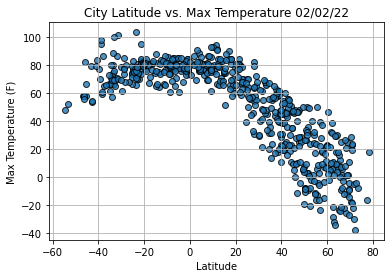

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

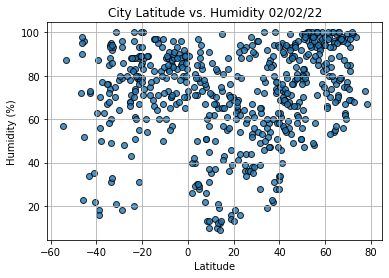

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

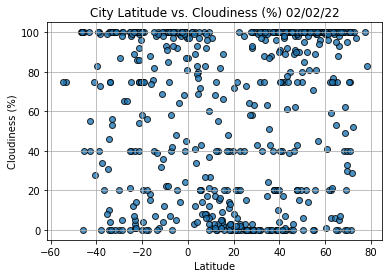

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

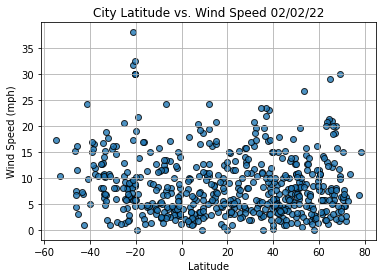

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                       Bethel
Lat                       41.3712
Lng                       -73.414
Max Temp                    46.49
Humidity                       73
Cloudiness                    100
Wind Speed                   5.75
Country                        US
Date          2022-02-02 20:24:52
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
571     True
572     True
573     True
574     True
575    False
Name: Lat, Length: 576, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Grindavik,63.8424,-22.4338,28.87,54,75,1.14,IS,2022-02-02 20:25:15
8,Magadan,59.5667,150.8000,11.66,85,100,9.31,RU,2022-02-02 20:25:17
10,Corvallis,44.5646,-123.2620,46.42,66,100,1.01,US,2022-02-02 20:23:38
11,Kapaa,22.0752,-159.3190,80.11,69,20,1.01,US,2022-02-02 20:24:49
12,Zurrieq,35.8311,14.4742,54.97,87,0,19.57,MT,2022-02-02 20:25:18


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

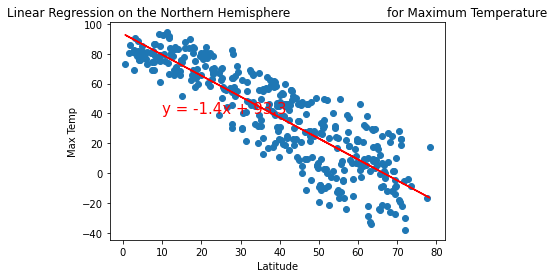

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

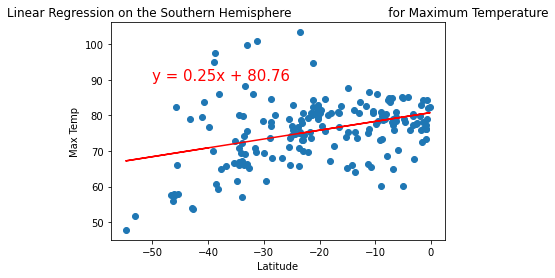

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

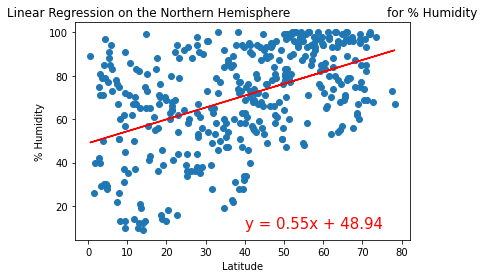

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

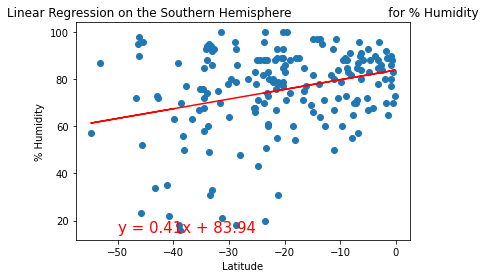

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

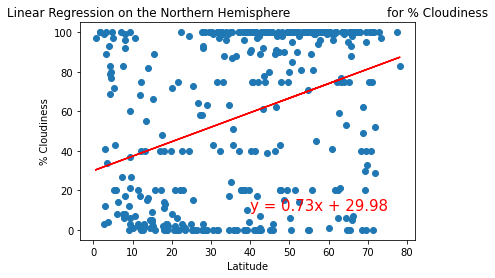

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

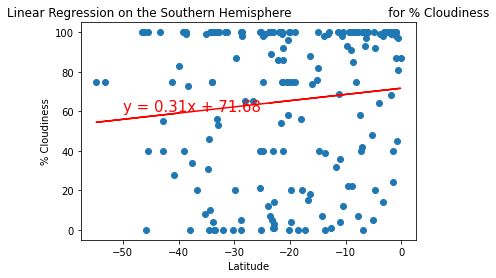

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

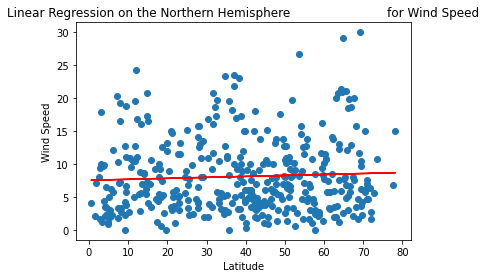

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

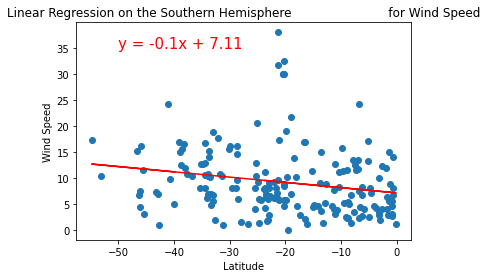

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))